# Question 2 (35%)
Write a function that generates a specified number of independent and identically distributed
samples paired with the class labels that generated these samples. Specifically, the data distribution
is a mixture of Gaussians with specified prior probabilities for each Gaussian class conditional pdf,
as well as respective mean vectors and covariance matrices. Generate and visualize data in the form
of scatter plots, with a color/marker based identification of the class label for each sample for each
of the following cases (using Matlab syntax for 2×2 matrices):
1. Number of samples = 400; class means [0,0]
T
and [3,3]
T
; class covariance matrices both set
to I; equal class priors.
2. All parameters same as (1), but both covariance matrices changed to [3,1; 1,0.8].
3. Number of samples = 400; class means[0,0]
T
and [2,2]
T
; class covariance matrices[2,0.5; 0.5,1]
and [2,−1.9;−1.9,5]; equal class priors.
4. Same (1), but prior for class priors are 0.05 and 0.95.
5. Same (2), but prior for class priors are 0.05 and 0.95.
6. Same (3), but prior for class priors are 0.05 and 0.95.
Make sure your plots include axis labels, titles, and data legends. Describe how your sampling
procedure works, using zero-mean identity-covariance Gaussian sample generators.
Additionally, for each of these datasets, use the maximum-a-priori (MAP) classification rule
(using full knowledge of the respective data pdfs) and produce inferred class labels for each data
samples. In accompanying visualizations, demonstrate scatter plots of the data for each case along
with their inferred (decision) labels. For each case, count the number of errors and estimate the
probability of error based on these counts.

In [1]:
import numpy as np

In [2]:
import math
from scipy.linalg import sqrtm

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Sample Generation
In the 'sample_data_generator' function below we generate our dataset for which we will eventually run the MAP Classifier.
This is a generic function and will be called in all the three cases to generate the samples.
It takes the Means, Covariances and Priors for each of the label data.
Since the number of samples in all the cases are 400, I have hardcoded 400 in the function below.
I then generate 400 samples in a Uniform Distribution using respective label priors.
Accordingly I gather the count of the number of samples that will be present in each label.
We are asked to Sample our dataset using Zero-Mean Identity-Covariance Gaussian sample generator.
We will generate a multivariate normal distribution (zi) having 0 mean and Identity covariance for each label, with the number of samples we calculated above.
Now we will linearly transform this normal distribution to the Mean and Covariance of our class labels using the following relation:
xi = A*zi + b; Here A = Σ−0.5 and b = μ


In [4]:
def sample_data_generator(mean1, cov1, mean2, cov2, p1, p2):
    uniform_set = np.random.uniform(0, 1, 400)
    prior_label = [0 if a < p1 else 1 for a in uniform_set]
    z_1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], prior_label.count(0))
    z_2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], prior_label.count(1))
    data1 = [np.matmul(sqrtm(cov1), z_1[i]) + mean1 for i in range(len(z_1))]
    data2 = [np.matmul(sqrtm(cov2), z_2[i]) + mean2 for i in range(len(z_2))]
    return np.array(data1), np.array(data2)

In [5]:
def map_classifier(mean1, mean2, cov1, cov2, p1, p2, x1, x2):
    px_1 = math.pow(2*math.pi, -1)*math.pow(np.linalg.det(cov1), -0.5)*math.exp((-0.5)*([x1, x2] - mean1).T.dot(np.linalg.inv(cov1)).dot([x1, x2] - mean1))
    px_2 = math.pow(2*math.pi, -1)*math.pow(np.linalg.det(cov2), -0.5)*math.exp((-0.5)*([x1, x2] - mean2).T.dot(np.linalg.inv(cov2)).dot([x1, x2] - mean2))
    if px_1*p1 > px_2*p2:
        return 0
    else:
        return 1

## 1. 
N=400

For Class Label 1: Mean = [0, 0] Covariance = I (Identity Matrix)

For Class Label 2: Mean = [3, 3] Covariance = I (Identity Matrix)


In [6]:
# Generating samples for Label 1
cov1 = np.array([[1.0, 0.0],
                [0.0, 1.0]])
mean1 = np.array([0., 0.])
p1 = 0.5

In [7]:
# Generating samples for Label 1
cov2 = np.array([[1.0, 0.0],
                [0.0, 1.0]])
mean2 = np.array([3., 3.])
p2 = 0.5

In [8]:
data1, data2 = sample_data_generator(mean1, cov1, mean2, cov2, p1, p2)

In [9]:
data1_edge = ['none' if map_classifier(mean1, mean2, cov1, cov2, p1, p2, a, b) == 0 else [0, 0, 0] for a,b in data1]
data2_edge = ['none' if map_classifier(mean1, mean2, cov1, cov2, p1, p2, a, b) == 1 else [0, 0, 0] for a,b in data2]

<IPython.core.display.Javascript object>


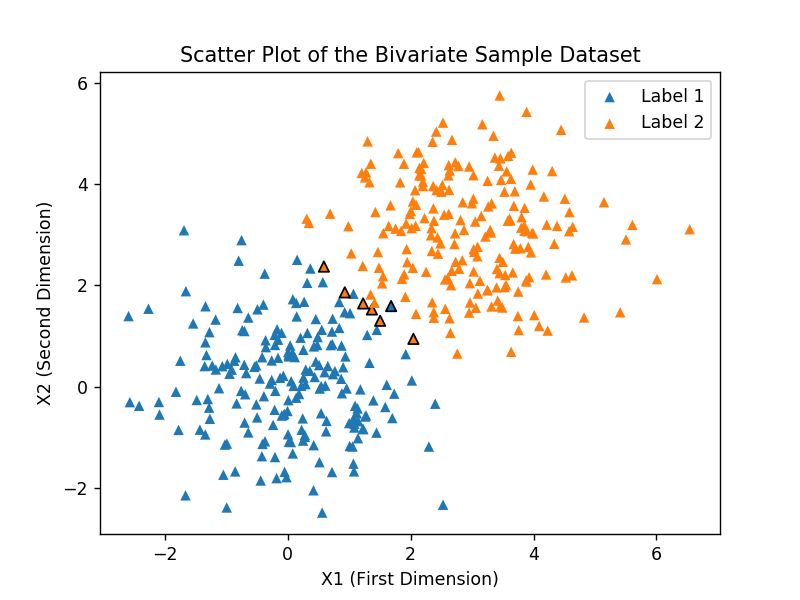

Text(0.5, 1.0, 'Scatter Plot of the Bivariate Sample Dataset')

In [10]:
# Plotting both the samples as a scatter plot
%matplotlib notebook
x1 = np.linspace(-4, 6, 50)
plt.scatter(data1[:, 0], data1[:, 1], marker='^', edgecolors=data1_edge, label='Label 1')
plt.scatter(data2[:, 0], data2[:, 1], marker='^', edgecolors=data2_edge, label='Label 2')
plt.legend()
plt.xlabel('X1 (First Dimension)')
plt.ylabel('X2 (Second Dimension)')
plt.title('Scatter Plot of the Bivariate Sample Dataset')

#### NOTE: Labels with Black Outlines are the Incorrect Classifications in the plot

In [11]:
# Probability of Error
num_misclassified_samples = len([a for a in data1_edge if a != 'none']) + len([a for a in data2_edge if a != 'none'])
print("The number of misclassification is: {}".format(num_misclassified_samples))
# The probability of error here is the number of labels that are classified incorrectly compared to the total 
# number of classified samples which is 400
p_error = num_misclassified_samples / (400)
print("The Probability of error is: {}".format(p_error))

The number of misclassification is: 7
The Probability of error is: 0.0175


## 2. 
N=400

For Class Label 1: Mean = [0, 0] Covariance = [3 1, 1, 0.8]

For Class Label 2: Mean = [3, 3] Covariance = [3 1, 1, 0.8]


In [12]:
# Generating samples for Label 1
cov1 = np.array([[3.0, 1.0],
                [1.0, 0.8]])
mean1 = np.array([0., 0.])
p1 = 0.5

In [13]:
# Generating samples for Label 2
cov2 = np.array([[1.0, 0.0],
                [0.0, 1.0]])
mean2 = np.array([3., 3.])
p2 = 0.5

In [14]:
data1, data2 = sample_data_generator(mean1, cov1, mean2, cov2, p1, p2)

In [15]:
data1_edge = ['none' if map_classifier(mean1, mean2, cov1, cov2, p1, p2, a, b) == 0 else [0, 0, 0] for a,b in data1]
data2_edge = ['none' if map_classifier(mean1, mean2, cov1, cov2, p1, p2, a, b) == 1 else [0, 0, 0] for a,b in data2]

<IPython.core.display.Javascript object>


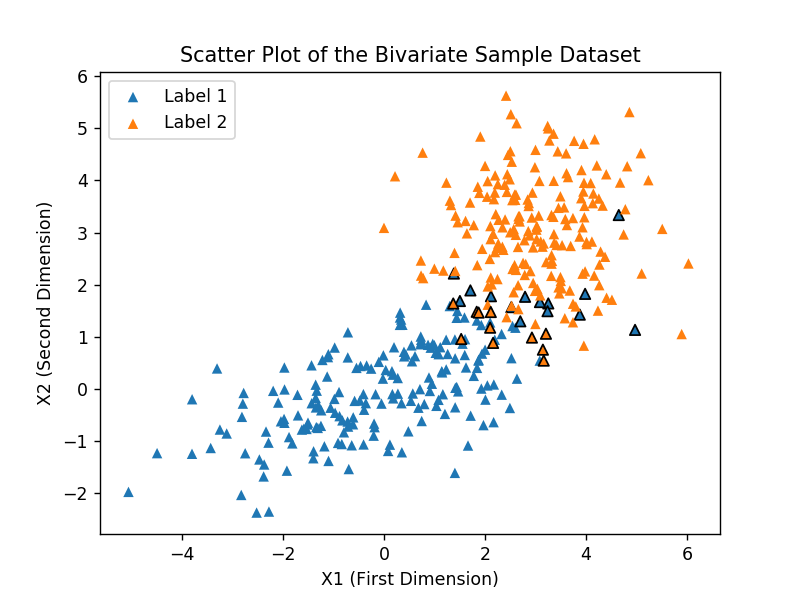

Text(0.5, 1.0, 'Scatter Plot of the Bivariate Sample Dataset')

In [16]:
# Plotting both the samples as a scatter plot
%matplotlib notebook
x1 = np.linspace(-4, 6, 50)
plt.scatter(data1[:, 0], data1[:, 1], marker='^', edgecolors=data1_edge, label='Label 1')
plt.scatter(data2[:, 0], data2[:, 1], marker='^', edgecolors=data2_edge, label='Label 2')
plt.legend()
plt.xlabel('X1 (First Dimension)')
plt.ylabel('X2 (Second Dimension)')
plt.title('Scatter Plot of the Bivariate Sample Dataset')

##### NOTE: Labels with black outlines are Incorrect Classifications

In [17]:
# Probability of Error
num_misclassified_samples = len([a for a in data1_edge if a != 'none']) + len([a for a in data2_edge if a != 'none'])
print("The number of misclassification is: {}".format(num_misclassified_samples))
# The probability of error here is the number of labels that are classified incorrectly compared to the total 
# number of classified samples which is 400
p_error = num_misclassified_samples / (400)
print("The Probability of error is: {}".format(p_error))

The number of misclassification is: 25
The Probability of error is: 0.0625


## 3. 
N=400

For Class Label 1: Mean = [0, 0] Covariance = [2 0.5, 0.5, 1]

For Class Label 2: Mean = [2, 2] Covariance = [2 -1.9, -1.9, 5]


In [18]:
# Generating samples for Label 1
cov1 = np.array([[2.0, 0.5],
                [0.5, 1]])
mean1 = np.array([0., 0.])
p1 = 0.5

In [19]:
# Generating samples for Label 2
cov2 = np.array([[2.0, -1.9],
                [-1.9, 5.0]])
mean2 = np.array([2., 2.])
p2 = 0.5

In [20]:
data1, data2 = sample_data_generator(mean1, cov1, mean2, cov2, p1, p2)

In [21]:
data1_edge = ['none' if map_classifier(mean1, mean2, cov1, cov2, p1, p2, a, b) == 0 else [0, 0, 0] for a,b in data1]
data2_edge = ['none' if map_classifier(mean1, mean2, cov1, cov2, p1, p2, a, b) == 1 else [0, 0, 0] for a,b in data2]

<IPython.core.display.Javascript object>


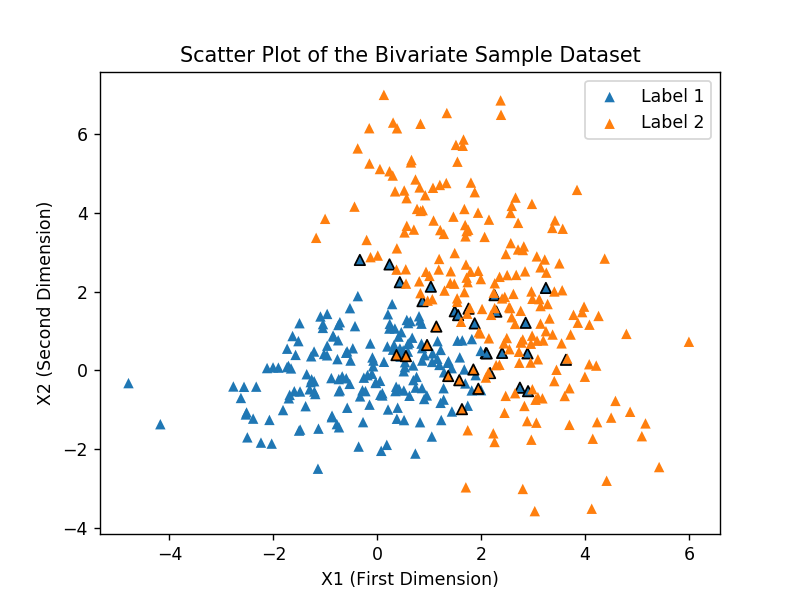

Text(0.5, 1.0, 'Scatter Plot of the Bivariate Sample Dataset')

In [22]:
# Plotting both the samples as a scatter plot
%matplotlib notebook
plt.scatter(data1[:, 0], data1[:, 1], marker='^', edgecolors=data1_edge, label='Label 1')
plt.scatter(data2[:, 0], data2[:, 1], marker='^', edgecolors=data2_edge, label='Label 2')
plt.legend()
plt.xlabel('X1 (First Dimension)')
plt.ylabel('X2 (Second Dimension)')
plt.title('Scatter Plot of the Bivariate Sample Dataset')

##### NOTE: Labels with black outlines are Incorrect Classifications

In [23]:
# Probability of Error
num_misclassified_samples = len([a for a in data1_edge if a != 'none']) + len([a for a in data2_edge if a != 'none'])
print("The number of misclassification is: {}".format(num_misclassified_samples))
# The probability of error here is the number of labels that are classified incorrectly compared to the total 
# number of classified samples which is 400
p_error = num_misclassified_samples / (400)
print("The Probability of error is: {}".format(p_error))

The number of misclassification is: 30
The Probability of error is: 0.075


## 4. 
N=400

For Class Label 1: Mean = [0, 0] Covariance = I (Identity Matrix)

For Class Label 2: Mean = [3, 3] Covariance = I (Identity Matrix)

P(w1) = 0.05   P(w2) = 0.95

In [24]:
# Generating samples for Label 1
cov1 = np.array([[1.0, 0.0],
                [0.0, 1.0]])
mean1 = np.array([0., 0.])
p1 = 0.05

In [25]:
# Generating samples for Label 1
cov2 = np.array([[1.0, 0.0],
                [0.0, 1.0]])
mean2 = np.array([3., 3.])
p2 = 0.95

In [26]:
data1, data2 = sample_data_generator(mean1, cov1, mean2, cov2, p1, p2)

In [27]:
data1_edge = ['none' if map_classifier(mean1, mean2, cov1, cov2, p1, p2, a, b) == 0 else [0, 0, 0] for a,b in data1]
data2_edge = ['none' if map_classifier(mean1, mean2, cov1, cov2, p1, p2, a, b) == 1 else [0, 0, 0] for a,b in data2]

<IPython.core.display.Javascript object>


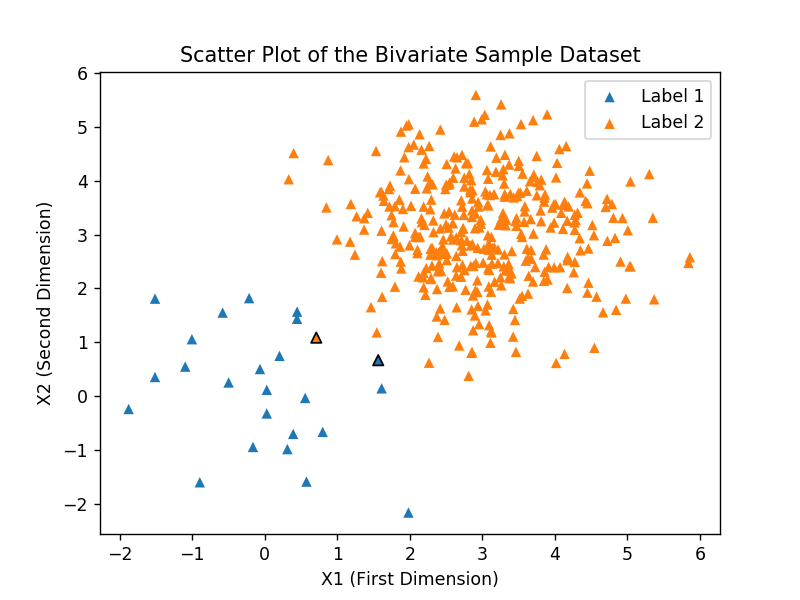

Text(0.5, 1.0, 'Scatter Plot of the Bivariate Sample Dataset')

In [28]:
# Plotting both the samples as a scatter plot
%matplotlib notebook
x1 = np.linspace(-4, 6, 50)
plt.scatter(data1[:, 0], data1[:, 1], marker='^', edgecolors=data1_edge, label='Label 1')
plt.scatter(data2[:, 0], data2[:, 1], marker='^', edgecolors=data2_edge, label='Label 2')
plt.legend()
plt.xlabel('X1 (First Dimension)')
plt.ylabel('X2 (Second Dimension)')
plt.title('Scatter Plot of the Bivariate Sample Dataset')

##### NOTE: Labels with black outlines are Incorrect Classifications

In [29]:
# Probability of Error
num_misclassified_samples = len([a for a in data1_edge if a != 'none']) + len([a for a in data2_edge if a != 'none'])
print("The number of misclassification is: {}".format(num_misclassified_samples))
# The probability of error here is the number of labels that are classified incorrectly compared to the total 
# number of classified samples which is 400
p_error = num_misclassified_samples / (400)
print("The Probability of error is: {}".format(p_error))

The number of misclassification is: 2
The Probability of error is: 0.005


## 5. 
N=400

For Class Label 1: Mean = [0, 0] Covariance = [3 1, 1, 0.8]

For Class Label 2: Mean = [3, 3] Covariance = [3 1, 1, 0.8]

P(w1) = 0.05  P(w2) = 0.95

In [30]:
# Generating samples for Label 1
cov1 = np.array([[3.0, 1.0],
                [1.0, 0.8]])
mean1 = np.array([0., 0.])
p1 = 0.05

In [31]:
# Generating samples for Label 1
cov2 = np.array([[1.0, 0.0],
                [0.0, 1.0]])
mean2 = np.array([3., 3.])
p2 = 0.95

In [32]:
data1, data2 = sample_data_generator(mean1, cov1, mean2, cov2, p1, p2)

In [33]:
data1_edge = ['none' if map_classifier(mean1, mean2, cov1, cov2, p1, p2, a, b) == 0 else [0, 0, 0] for a,b in data1]
data2_edge = ['none' if map_classifier(mean1, mean2, cov1, cov2, p1, p2, a, b) == 1 else [0, 0, 0] for a,b in data2]

<IPython.core.display.Javascript object>


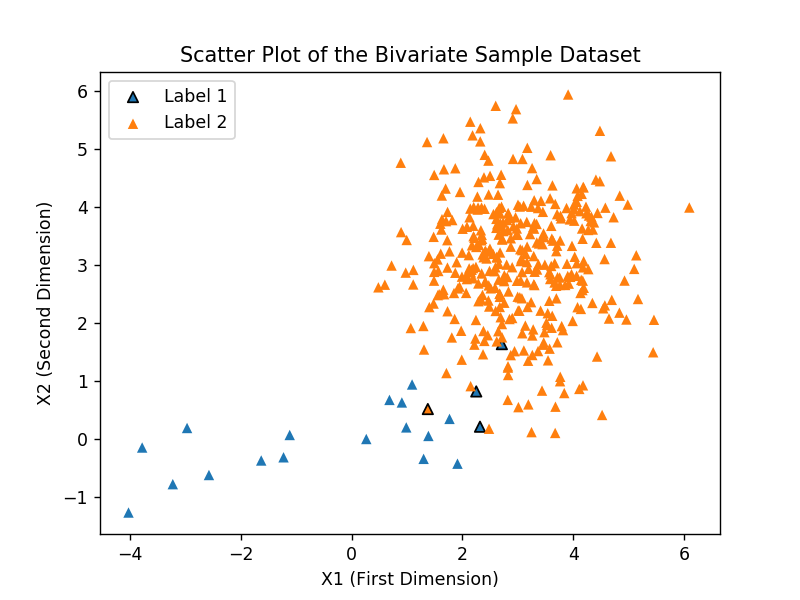

Text(0.5, 1.0, 'Scatter Plot of the Bivariate Sample Dataset')

In [34]:
# Plotting both the samples as a scatter plot
%matplotlib notebook
x1 = np.linspace(-4, 6, 50)
plt.scatter(data1[:, 0], data1[:, 1], marker='^', edgecolors=data1_edge, label='Label 1')
plt.scatter(data2[:, 0], data2[:, 1], marker='^', edgecolors=data2_edge, label='Label 2')
plt.legend()
plt.xlabel('X1 (First Dimension)')
plt.ylabel('X2 (Second Dimension)')
plt.title('Scatter Plot of the Bivariate Sample Dataset')

##### NOTE: Labels with black outlines are Incorrect Classifications

In [35]:
# Probability of Error
num_misclassified_samples = len([a for a in data1_edge if a != 'none']) + len([a for a in data2_edge if a != 'none'])
print("The number of misclassification is: {}".format(num_misclassified_samples))
# The probability of error here is the number of labels that are classified incorrectly compared to the total 
# number of classified samples which is 400
p_error = num_misclassified_samples / (400)
print("The Probability of error is: {}".format(p_error))

The number of misclassification is: 4
The Probability of error is: 0.01


## 6. 
N=400

For Class Label 1: Mean = [0, 0] Covariance = [2 0.5, 0.5, 1]

For Class Label 2: Mean = [2, 2] Covariance = [2 -1.9, -1.9, 5]

P(w1) = 0.05 P(w2) = 0.95

In [36]:
# Generating samples for Label 1
cov1 = np.array([[2.0, 0.5],
                [0.5, 1]])
mean1 = np.array([0., 0.])
p1 = 0.05

In [37]:
# Generating samples for Label 2
cov2 = np.array([[2.0, -1.9],
                [-1.9, 5.0]])
mean2 = np.array([2., 2.])
p2 = 0.95

In [38]:
data1, data2 = sample_data_generator(mean1, cov1, mean2, cov2, p1, p2)

In [39]:
data1_edge = ['none' if map_classifier(mean1, mean2, cov1, cov2, p1, p2, a, b) == 0 else [0, 0, 0] for a,b in data1]
data2_edge = ['none' if map_classifier(mean1, mean2, cov1, cov2, p1, p2, a, b) == 1 else [0, 0, 0] for a,b in data2]

<IPython.core.display.Javascript object>


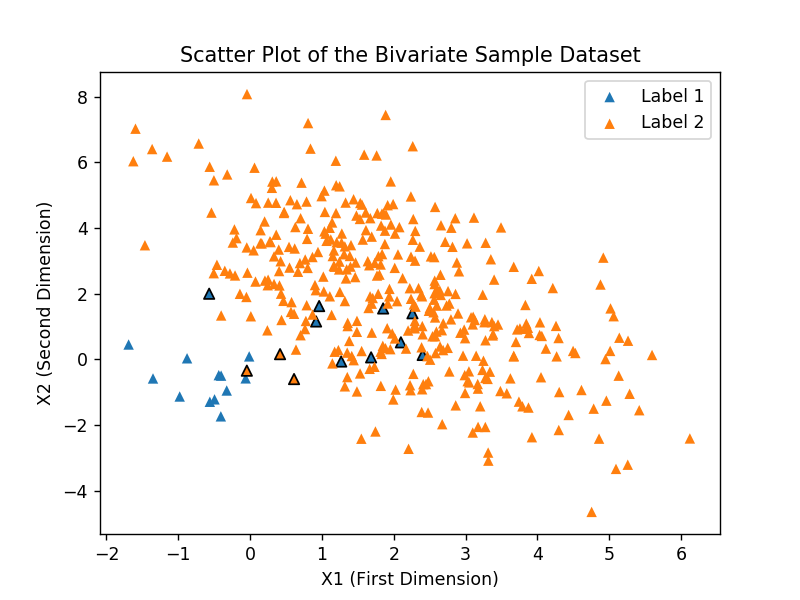

Text(0.5, 1.0, 'Scatter Plot of the Bivariate Sample Dataset')

In [40]:
# Plotting both the samples as a scatter plot
%matplotlib notebook
plt.scatter(data1[:, 0], data1[:, 1], marker='^', edgecolors=data1_edge, label='Label 1')
plt.scatter(data2[:, 0], data2[:, 1], marker='^', edgecolors=data2_edge, label='Label 2')
plt.legend()
plt.xlabel('X1 (First Dimension)')
plt.ylabel('X2 (Second Dimension)')
plt.title('Scatter Plot of the Bivariate Sample Dataset')

##### NOTE: Labels with black outlines are Incorrect Classifications

In [41]:
# Probability of Error
num_misclassified_samples = len([a for a in data1_edge if a != 'none']) + len([a for a in data2_edge if a != 'none'])
print("The number of misclassification is: {}".format(num_misclassified_samples))
# The probability of error here is the number of labels that are classified incorrectly compared to the total 
# number of classified samples which is 400
p_error = num_misclassified_samples / (400)
print("The Probability of error is: {}".format(p_error))

The number of misclassification is: 12
The Probability of error is: 0.03
